In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import statistics
import scipy.stats as sts
n = 16
a = -1
gamma = 0.9
sigma = 4
M= 1950
K = 180

1

In [3]:
count = 0.0
for j in range(0,M):
    sample = np.random.normal(a, sigma, n)#создание выборки
    
    #s
    S = np.var(sample, ddof=1)
    # Определение квантилей
    alpha = 1 - gamma
    chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
    chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
    #границы доверительного интервала для дисперсии
    confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]
    
    if confidence_intervals[0]<sigma**2 and confidence_intervals[1]>sigma**2:
        count +=1

GAMMA = count/M
print(GAMMA)

0.897948717948718


2

In [10]:
K_items = []
for i in range(0, K):
    count = 0.0
    for j in range(0,M):
        sample_i = np.random.normal(a, sigma, n)#создание выборки
        
        #s
        S = np.var(sample_i, ddof=1)
        # Определение квантилей
        alpha = 1 - gamma
        chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
        chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
        #границы доверительного интервала для дисперсии
        confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]
        
        if confidence_intervals[0]<sigma**2 and confidence_intervals[1]>sigma**2:
            count +=1

    K_items.append(count/M)


In [11]:
print(f'Математическое ожидание: {statistics.mean(K_items)}')
print(f'Дисперсия: {statistics.variance(K_items)}') 
print(f'Эксцесс: {sts.kurtosis(K_items)}')
print(f'Коэфициент ассиметрии: {sts.skew(K_items)}')
print(f'Стандартное отклонение: {math.sqrt(statistics.variance(K_items))}')
print(f'Медиана: {statistics.median(K_items)}')

Математическое ожидание: 0.8995270655270655
Дисперсия: 4.2790006737865205e-05
Эксцесс: -0.08270494705938525
Коэфициент ассиметрии: 0.11888501214423962
Стандартное отклонение: 0.006541407091587039
Медиана: 0.8994871794871795


(array([ 6.37254902, 19.11764706, 31.8627451 , 55.75980392, 60.53921569,
        43.01470588, 43.01470588, 17.5245098 ,  4.77941176,  4.77941176]),
 array([0.88358974, 0.88707692, 0.8905641 , 0.89405128, 0.89753846,
        0.90102564, 0.90451282, 0.908     , 0.91148718, 0.91497436,
        0.91846154]),
 <BarContainer object of 10 artists>)

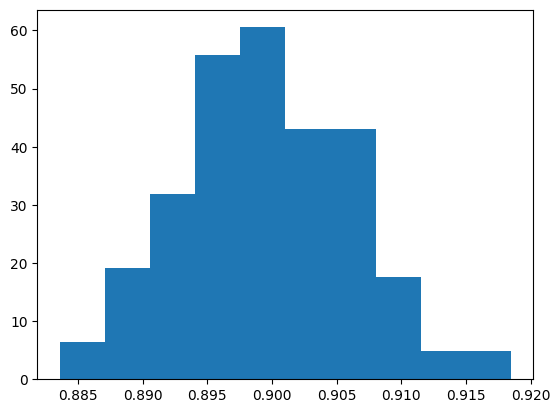

In [12]:
plt.hist(K_items, density=True)

<Axes: >

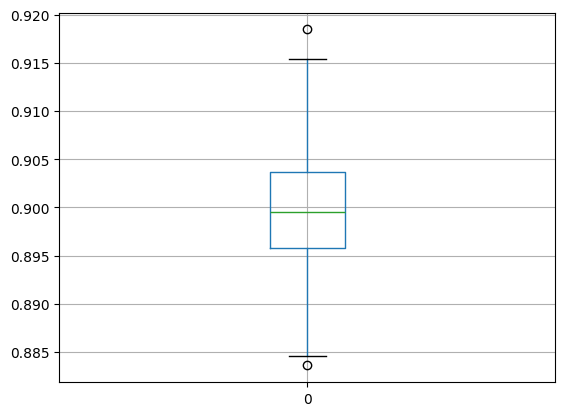

In [13]:
data_frame = pd.DataFrame(K_items)
data_frame.boxplot()

3

In [19]:
k1 = 3
k2 = 3
size_U = 6
count = 0.0
for i in range(0, M):
    
    sample_W = []
    for j in range(0, n):
        U_values = sts.f.rvs(k1, k2, size=size_U)
        W = (1/size_U) * np.sum(U_values)
        sample_W.append(W)
 
    S = np.var(sample_W, ddof=1)
    alpha = 1 - gamma
    chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
    chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
    #границы доверительного интервала для дисперсии
    confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]

    if confidence_intervals[0]<k1*k2 and confidence_intervals[1]>k1*k2:
        count +=1

    ##count = np.sum((S >= confidence_intervals[0]) & (S <= confidence_intervals[1]))
GAMMA = count/M
print(GAMMA)

0.2856410256410256


4

In [21]:
k1 = 3
k2 = 3
size_U = 6
count = 0.0
K_items3 = []
for i in range(0, K):
    count = 0.0
    for i in range(0, M):
        sample_W = []
        for j in range(0, n):
            U_values = sts.f.rvs(k1, k2, size=size_U)
            W = (1/size_U) * np.sum(U_values)
            sample_W.append(W)
    
        S = np.var(sample_W, ddof=1)
        alpha = 1 - gamma
        chi2_alpha_over_2_lower = sts.chi2.ppf(alpha / 2, df=n - 1)
        chi2_alpha_over_2_upper = sts.chi2.ppf(1 - alpha / 2, df=n - 1)
        #границы доверительного интервала для дисперсии
        confidence_intervals = [(n - 1) * S / chi2_alpha_over_2_upper, (n - 1) * S / chi2_alpha_over_2_lower]

        if confidence_intervals[0]<k1*k2 and confidence_intervals[1]>k1*k2:
            count +=1

    K_items3.append(count/M)

print(f'Математическое ожидание: {statistics.mean(K_items3)}')
print(f'Дисперсия: {statistics.variance(K_items3)}') 
print(f'Эксцесс: {sts.kurtosis(K_items3)}')
print(f'Коэфициент ассиметрии: {sts.skew(K_items3)}')
print(f'Стандартное отклонение: {math.sqrt(statistics.variance(K_items3))}')
print(f'Медиана: {statistics.median(K_items3)}')

Математическое ожидание: 0.2927122507122507
Дисперсия: 0.00012131386331071187
Эксцесс: -0.239258922099304
Коэфициент ассиметрии: 0.07371159970911309
Стандартное отклонение: 0.011014257274583333
Медиана: 0.29307692307692307


(array([ 2.70833333,  5.41666667, 23.47222222, 28.88888889, 27.08333333,
        33.40277778, 25.27777778, 12.63888889,  1.80555556,  1.80555556]),
 array([0.26410256, 0.27025641, 0.27641026, 0.2825641 , 0.28871795,
        0.29487179, 0.30102564, 0.30717949, 0.31333333, 0.31948718,
        0.32564103]),
 <BarContainer object of 10 artists>)

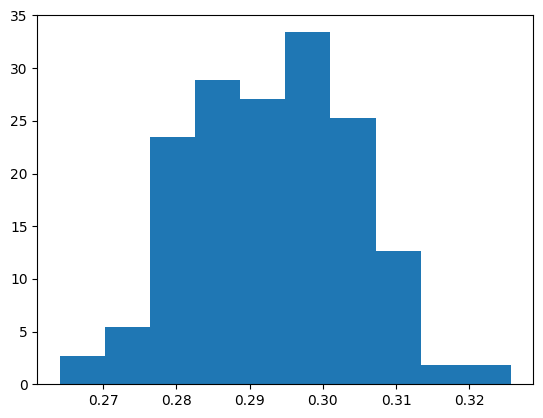

In [22]:
plt.hist(K_items3, density=True)

<Axes: >

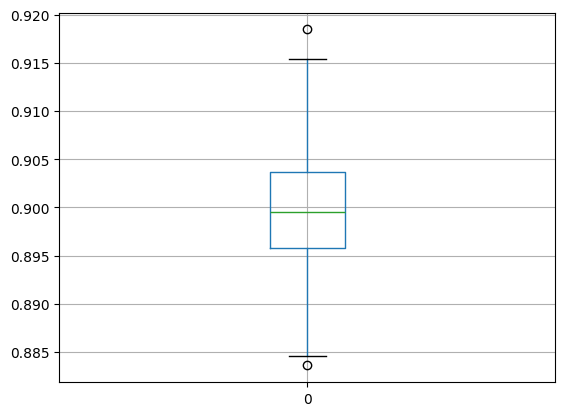

In [23]:
data_frame = pd.DataFrame(K_items)
data_frame.boxplot()